# Imports

In [316]:

import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
plotting.setup_mpl()
ff1.Cache.enable_cache('../cache/')
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import requests
import re
pio.templates.default = "plotly_dark"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.max_rows = 75
pd.options.display.max_columns = 99

In [317]:
year = 2022
gp_round = 4
ses = 'Q'

In [318]:
driver_1 = 'VER'
driver_2 = 'LEC'
team_1 = 'Red Bull'
team_2 = 'Ferrari'

In [319]:
events_list = ff1.get_event_schedule(2022)[2:]

session = ff1.get_session(year, gp_round, ses)
session.load(weather=True, telemetry=True)

core           INFO 	Loading data for Emilia Romagna Grand Prix - Qualifying [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '4', '20', '14', '3', '11', '77', '5', '55', '63', '47', '44', '24', '18', '22', '10', '6', '31', '23']


In [320]:
events_list

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport
2,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022,2022-03-20 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2022-03-18 15:00:00,Practice 2,2022-03-18 18:00:00,Practice 3,2022-03-19 15:00:00,Qualifying,2022-03-19 18:00:00,Race,2022-03-20 18:00:00,True
3,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022,2022-03-27 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2022-03-25 17:00:00,Practice 2,2022-03-25 20:00:00,Practice 3,2022-03-26 17:00:00,Qualifying,2022-03-26 20:00:00,Race,2022-03-27 20:00:00,True
4,3,Australia,Melbourne,FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022,2022-04-10 17:00:00,Australian Grand Prix,conventional,Practice 1,2022-04-08 13:00:00,Practice 2,2022-04-08 16:00:00,Practice 3,2022-04-09 13:00:00,Qualifying,2022-04-09 16:00:00,Race,2022-04-10 15:00:00,True
5,4,Italy,Imola,FORMULA 1 ROLEX GRAN PREMIO DEL MADE IN ITALY E DELL'EMILIA-ROMAGNA 2022,2022-04-24 17:00:00,Emilia Romagna Grand Prix,sprint,Practice 1,2022-04-22 13:30:00,Qualifying,2022-04-22 17:00:00,Practice 2,2022-04-23 12:30:00,Sprint,2022-04-23 16:30:00,Race,2022-04-24 15:00:00,True
6,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2022,2022-05-08 17:30:00,Miami Grand Prix,conventional,Practice 1,2022-05-06 14:30:00,Practice 2,2022-05-06 17:30:00,Practice 3,2022-05-07 13:00:00,Qualifying,2022-05-07 16:00:00,Race,2022-05-08 15:30:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,18,Japan,Suzuka,FORMULA 1 JAPANESE GRAND PRIX 2022,2022-10-09 16:00:00,Japanese Grand Prix,conventional,Practice 1,2022-10-07 13:00:00,Practice 2,2022-10-07 16:00:00,Practice 3,2022-10-08 13:00:00,Qualifying,2022-10-08 16:00:00,Race,2022-10-09 14:00:00,True
20,19,United States,Austin,FORMULA 1 ARAMCO UNITED STATES GRAND PRIX 2022,2022-10-23 16:00:00,United States Grand Prix,conventional,Practice 1,2022-10-21 14:00:00,Practice 2,2022-10-21 17:00:00,Practice 3,2022-10-22 14:00:00,Qualifying,2022-10-22 17:00:00,Race,2022-10-23 14:00:00,True
21,20,Mexico,Mexico City,FORMULA 1 GRAN PREMIO DE LA CIUDAD DE MÉXICO 2022,2022-10-30 16:00:00,Mexico City Grand Prix,conventional,Practice 1,2022-10-28 13:00:00,Practice 2,2022-10-28 16:00:00,Practice 3,2022-10-29 12:00:00,Qualifying,2022-10-29 15:00:00,Race,2022-10-30 14:00:00,True
22,21,Brazil,São Paulo,FORMULA 1 HEINEKEN GRANDE PRÊMIO DE SÃO PAULO 2022,2022-11-13 17:00:00,São Paulo Grand Prix,sprint,Practice 1,2022-11-11 12:30:00,Qualifying,2022-11-11 16:00:00,Practice 2,2022-11-12 12:30:00,Sprint,2022-11-12 16:30:00,Race,2022-11-13 15:00:00,True


In [321]:
results = session.results

In [322]:
fastest_lap = session.laps.pick_fastest()
tel = fastest_lap.telemetry
tel

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-04-22 15:38:34.589,0 days 00:49:01.645000,,1505.003611,0 days 00:00:00,11078,275,7,100,False,9,interpolation,0.030889,0.000006,OnTrack,-1492,-1603,784
3,2022-04-22 15:38:34.680,0 days 00:49:01.736000,,1505.003611,0 days 00:00:00.091000,11110,276,7,100,False,9,car,7.015000,0.001433,OnTrack,-1546,-1607,785
4,2022-04-22 15:38:34.807,0 days 00:49:01.863000,,1505.003611,0 days 00:00:00.218000,11136,277,7,100,False,9,pos,16.795204,0.003431,OnTrack,-1631,-1613,786
5,2022-04-22 15:38:34.960,0 days 00:49:02.016000,3,1505.003611,0 days 00:00:00.371000,11162,278,7,100,False,9,car,28.637222,0.005849,OnTrack,-1747,-1619,786
6,2022-04-22 15:38:35.047,0 days 00:49:02.103000,3,1501.536944,0 days 00:00:00.458000,11209,279,7,100,False,9,pos,35.404786,0.007232,OnTrack,-1816,-1623,787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,2022-04-22 15:39:53.281,0 days 00:50:20.337000,3,806.221667,0 days 00:01:18.692000,11196,278,7,100,False,9,car,4855.257222,0.991725,OnTrack,-1269,-1592,784
613,2022-04-22 15:39:53.287,0 days 00:50:20.343000,3,806.558704,0 days 00:01:18.698000,11202,278,7,100,False,9,pos,4855.721871,0.991820,OnTrack,-1274,-1593,785
614,2022-04-22 15:39:53.467,0 days 00:50:20.523000,3,806.895741,0 days 00:01:18.878000,11208,279,7,100,False,9,pos,4869.709714,0.994677,OnTrack,-1413,-1599,785
615,2022-04-22 15:39:53.561,0 days 00:50:20.617000,3,807.232778,0 days 00:01:18.972000,11214,280,7,100,False,9,car,4877.035000,0.996174,OnTrack,-1486,-1603,785


In [323]:
session_weather = session.weather_data
session_weather

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:53.011000,12.7,84.0,997.2,False,15.5,247,4.5
1,0 days 00:01:53.024000,12.6,83.0,997.2,False,15.4,257,4.6
2,0 days 00:02:53.040000,12.6,83.0,997.2,False,15.2,252,3.9
3,0 days 00:03:53.040000,12.6,84.0,997.2,False,15.2,258,4.5
4,0 days 00:04:53.042000,12.6,83.0,997.2,False,15.2,275,3.7
...,...,...,...,...,...,...,...,...
108,0 days 01:48:53.497000,12.0,91.0,998.2,True,13.7,253,1.8
109,0 days 01:49:53.497000,12.0,91.0,998.2,True,13.7,253,1.8
110,0 days 01:50:53.498000,12.0,92.0,998.2,True,13.7,253,2.5
111,0 days 01:51:53.517000,12.0,92.0,998.2,True,13.7,260,1.8


In [324]:
# Function to format timedelta Series as string if necessary
def format_time(timedelta_series, num):
    t_list_str = []
    for i in timedelta_series:
        i = str(i)
        t_list_str.append(i[num:-3])
        
    return t_list_str

In [325]:
fastest_driver_1 = session.laps.pick_driver(driver_1).pick_fastest()
fastest_driver_2 = session.laps.pick_driver(driver_2).pick_fastest()

In [326]:
car_data_1 = fastest_driver_1.get_car_data().add_distance()
car_data_1['Distance'] = round(car_data_1['Distance'])
car_data_2 = fastest_driver_2.get_car_data().add_distance()
car_data_2['Distance'] = round(car_data_2['Distance'])

In [327]:
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)
plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}"
hovertemplate_speed = 'Speed: %{y} km/h'+'<br>Distance: %{x} meters'
hovertemplate_gear = 'Gear: %{y}'+'<br>Distance: %{x} meters'

In [328]:

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
fig.add_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
fig.add_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8, line_width=1), secondary_y=True)

fig.update_yaxes(title_text="Speed (km/h)", secondary_y=False)
fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", secondary_y=True)
fig.update_layout(width=1200, height=600, title_text=plot_title, xaxis_title='Distance (m)', title_x=0.5)
fig.show()

def plot_stacked_data(car_data_1, car_data_2):
    
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.add_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
    fig.add_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
    fig.add_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8, line_width=1), secondary_y=True)

    fig.update_yaxes(title_text="Speed (km/h)", secondary_y=False)
    fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", secondary_y=True)
    fig.update_layout(width=1200, height=600, title_text=plot_title, xaxis_title='Distance (m)', title_x=0.5)
    
    return fig

In [329]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=('Speed', 'Gear', 'Delta Time'), vertical_spacing=0.1)

fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)
fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)

fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['nGear'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)
fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['nGear'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)

fig.append_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', mode='lines', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8), 3, 1)

fig.update_yaxes(title_text="Speed (km/h)", row=1, col=1)
fig.update_yaxes(title_text="Gear", row=2, col=1)
fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", row=3, col=1)
fig.update_xaxes(title_text="Distance (m)", row=3, col=1)

fig.update_layout(width=1200, height=1200, title_text=plot_title, title_x=0.1)
fig.show()

In [330]:
# Returns only laps quicker than 107% of the quickest lap of the session, removing outlaps and inlaps.
session.laps.pick_quicklaps()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
4,0 days 00:31:48.878000,1,0 days 00:01:21.487000,5,2,NaT,NaT,0 days 00:00:26.384000,0 days 00:00:27.552000,0 days 00:00:27.551000,0 days 00:30:53.775000,0 days 00:31:21.327000,0 days 00:31:48.878000,214.0,257.0,274.0,293.0,False,SOFT,3.0,True,0 days 00:30:27.391000,Red Bull Racing,VER,1,True,2022-04-22 15:20:00.335
5,0 days 00:33:09.227000,1,0 days 00:01:20.349000,6,2,NaT,NaT,0 days 00:00:26.051000,0 days 00:00:27.324000,0 days 00:00:26.974000,0 days 00:32:14.929000,0 days 00:32:42.253000,0 days 00:33:09.227000,216.0,259.0,277.0,294.0,False,SOFT,4.0,True,0 days 00:31:48.878000,Red Bull Racing,VER,1,True,2022-04-22 15:21:21.822
9,0 days 00:39:17.925000,1,0 days 00:01:19.295000,10,2,NaT,NaT,0 days 00:00:25.546000,0 days 00:00:26.935000,0 days 00:00:26.814000,0 days 00:38:24.176000,0 days 00:38:51.111000,0 days 00:39:17.925000,220.0,261.0,276.0,295.0,False,SOFT,8.0,True,0 days 00:37:58.630000,Red Bull Racing,VER,1,True,2022-04-22 15:27:31.574
12,0 days 00:50:56.074000,1,0 days 00:01:18.793000,13,3,NaT,NaT,0 days 00:00:25.472000,0 days 00:00:26.850000,0 days 00:00:26.471000,0 days 00:50:02.753000,0 days 00:50:29.603000,0 days 00:50:56.074000,220.0,259.0,275.0,294.0,False,SOFT,3.0,True,0 days 00:49:37.281000,Red Bull Racing,VER,1,True,2022-04-22 15:39:10.225
24,0 days 00:30:56.569000,16,0 days 00:01:23.672000,3,2,NaT,NaT,0 days 00:00:27.456000,0 days 00:00:28.623000,0 days 00:00:27.593000,0 days 00:30:00.353000,0 days 00:30:28.976000,0 days 00:30:56.569000,215.0,257.0,274.0,289.0,False,SOFT,4.0,False,0 days 00:29:32.897000,Ferrari,LEC,1,True,2022-04-22 15:19:05.841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0 days 00:38:41.441000,10,0 days 00:01:20.732000,10,3,NaT,NaT,0 days 00:00:26.390000,0 days 00:00:27.254000,0 days 00:00:27.088000,0 days 00:37:47.099000,0 days 00:38:14.353000,0 days 00:38:41.441000,217.0,256.0,271.0,289.0,True,SOFT,8.0,True,0 days 00:37:20.709000,AlphaTauri,GAS,1,True,2022-04-22 15:26:53.653
328,0 days 00:37:47.261000,6,0 days 00:01:23.263000,10,4,NaT,NaT,0 days 00:00:27.099000,0 days 00:00:28.060000,0 days 00:00:28.104000,0 days 00:36:51.097000,0 days 00:37:19.157000,0 days 00:37:47.261000,212.0,260.0,274.0,294.0,False,SOFT,3.0,True,0 days 00:36:23.998000,Williams,LAT,1,True,2022-04-22 15:25:56.942
330,0 days 00:40:49.439000,6,0 days 00:01:21.971000,12,4,NaT,NaT,0 days 00:00:26.653000,0 days 00:00:27.869000,0 days 00:00:27.449000,0 days 00:39:54.121000,0 days 00:40:21.990000,0 days 00:40:49.439000,210.0,259.0,274.0,295.0,True,SOFT,5.0,True,0 days 00:39:27.468000,Williams,LAT,1,True,2022-04-22 15:29:00.412
336,0 days 00:30:23.274000,31,0 days 00:01:23.240000,5,2,NaT,NaT,0 days 00:00:26.917000,0 days 00:00:28.199000,0 days 00:00:28.124000,0 days 00:29:26.951000,0 days 00:29:55.150000,0 days 00:30:23.274000,216.0,255.0,272.0,285.0,False,SOFT,6.0,False,0 days 00:29:00.034000,Alpine,OCO,1,True,2022-04-22 15:18:32.978


In [331]:
lap_1 = fastest_driver_1.telemetry
lap_2 = fastest_driver_2.telemetry

In [332]:
start_line_dict = {1: [120, 1280, '^'],
                   2: [-1341, 2800, '<'],
                   3: [-1228, 100, '<'],
                   4: [-1533, -650, '<'],
                   5: [2633, 128, '>'],
                   6: [25, -469, '<'],
                   7: [-8065, -6549, '^']
}

In [333]:
colormap_speed = mpl.cm.RdYlGn
colormap_gear = mpl.cm.get_cmap('RdYlGn', 8)
points = np.array([lap_1['X'], lap_1['Y']]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
start_x = points[0][0][0]
start_y = points[0][0][1]
direction_x = start_line_dict[gp_round][0]
direction_y = start_line_dict[gp_round][1]
direction_marker = start_line_dict[gp_round][2]
px = 1/plt.rcParams['figure.dpi']

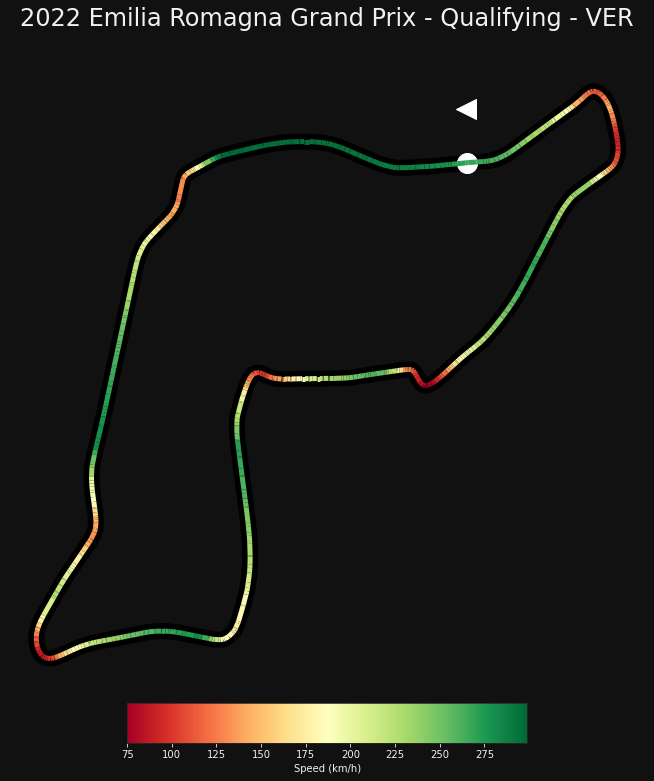

In [335]:
# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*px, 800*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(lap_1['Speed'].min(), lap_1['Speed'].max())
lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(lap_1['Speed'])

# Merge all line segments together
line = ax.add_collection(lc)

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=lap_1['Speed'].min(), vmax=lap_1['Speed'].max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label='Speed (km/h)')

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

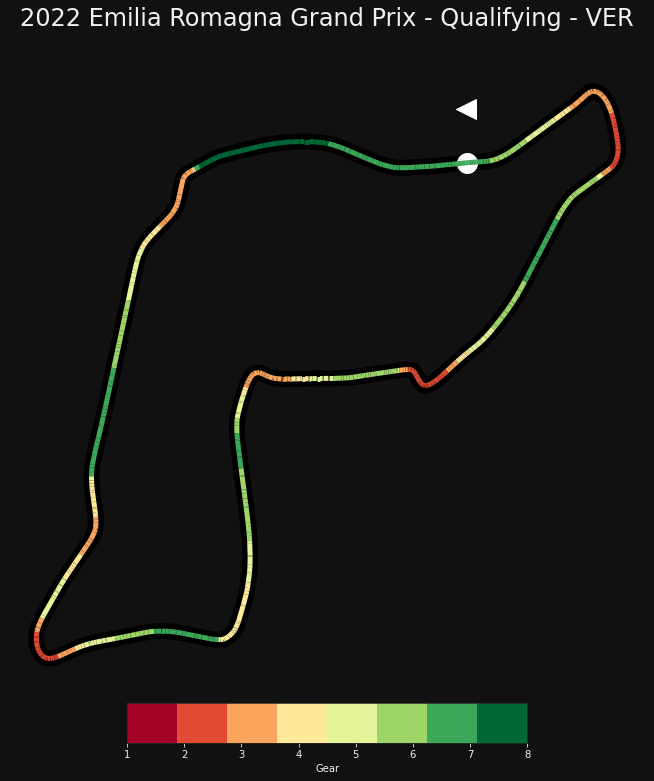

In [336]:
# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*px, 800*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

# Create a norm to map from data points to colors
norm = plt.Normalize(1, colormap_gear.N+1)
lc = LineCollection(segments, cmap=colormap_gear, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(lap_1['nGear'].to_numpy().astype(float))

# Merge all line segments together
line = ax.add_collection(lc)

# Create a color bar as a legend
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=1, vmax=8)
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_gear, orientation="horizontal", label='Gear')

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

In [337]:
def delta_bounds(vmin, vmax):
    if abs(vmin) < abs(vmax):
        vmin = -(vmax)
    else:
        vmax = -(vmin)
    return vmin, vmax

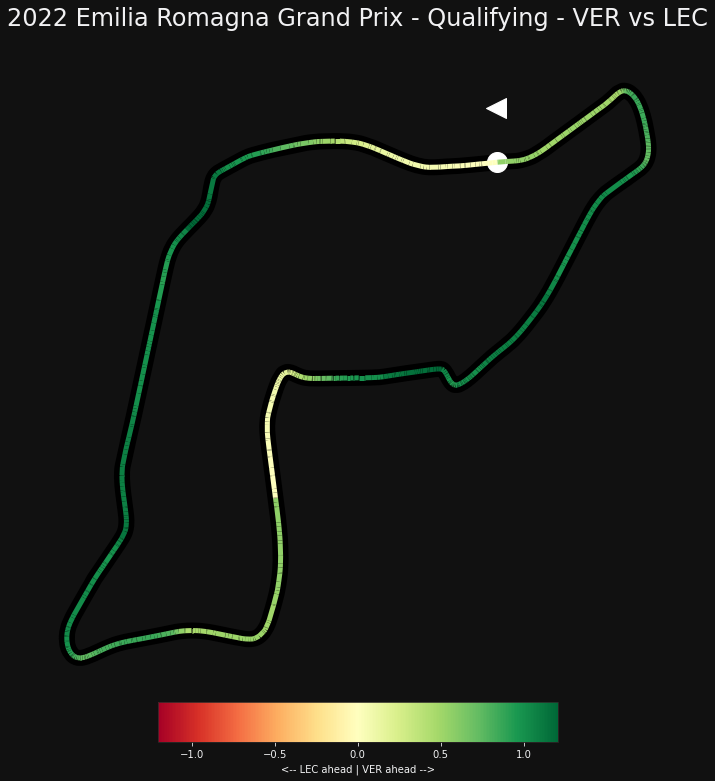

In [338]:
# Determine boundaries for the colorbar
vmin, vmax = delta_bounds(delta_time.min(), delta_time.max())

# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*px, 800*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_2['X'], lap_2['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(vmin, vmax)
lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(delta_time)

# Merge all line segments together
line = ax.add_collection(lc)

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label=f"<-- {driver_2} ahead | {driver_1} ahead -->")

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

In [357]:
race = session.laps
race = race.sort_values('Time').reset_index(drop=True)

# Tests

In [342]:
# Ergast API base request
def ergast_retrieve(api_endpoint: str):
    url = f'https://ergast.com/api/f1/{api_endpoint}.json'
    response = requests.get(url).json()
    
    return response['MRData']

In [354]:
# Get drivers standings
def update_driver_standings(rounds):
    standings_dict = {}
    for i in range(1, rounds+1):
        try:
            r = ergast_retrieve(f'current/{i}/driverStandings')
            standings = r['StandingsTable']['StandingsLists'][0]['DriverStandings']
            for j in standings:
                if j['Driver']['code'] not in standings_dict:
                    if i > 1:
                        num = i - 1
                        standings_dict[j['Driver']['code']] = [0] * num
                        standings_dict[j['Driver']['code']].append(j['points'])
                    else:
                        standings_dict[j['Driver']['code']] = [j['points']]
                else:
                    if len(standings_dict[j['Driver']['code']]) < (i - 1):
                        num_missing = (i + 1) - len(standings_dict[j['Driver']['code']])
                        print(num_missing)
                        standings_dict[j['Driver']['code']] = standings_dict[j['Driver']['code']] + [0] * num_missing
                        standings_dict[j['Driver']['code']].append(j['points'])
                    else:
                        standings_dict[j['Driver']['code']].append(j['points'])
        except IndexError:
            break
    
    df_drivers = pd.DataFrame.from_dict(standings_dict, orient='index')
    df_drivers.columns = df_drivers.columns + 1
    df_drivers[df_drivers.columns] = df_drivers[df_drivers.columns].apply(pd.to_numeric)
    df_drivers.sort_values(by=df_drivers.columns[-1], ascending=False, inplace=True)
    return df_drivers

df_drivers = update_driver_standings(22)
df_drivers.to_csv('../data/drivers_standings.csv')

In [355]:
# Get constructors standings
def update_constructor_standings(rounds):
    standings_dict = {}
    for i in range(1, rounds+1):
        try:
            r = ergast_retrieve(f'current/{i}/constructorStandings')
            standings = r['StandingsTable']['StandingsLists'][0]['ConstructorStandings']
            for i in standings:
                if i['Constructor']['name'] not in standings_dict:
                    standings_dict[i['Constructor']['name']] = [i['points']]
                else:
                    standings_dict[i['Constructor']['name']].append(i['points'])
        except IndexError:
            break
        
    df_constructors = pd.DataFrame.from_dict(standings_dict, orient='index')
    df_constructors.columns = df_constructors.columns + 1
    df_constructors[df_constructors.columns] = df_constructors[df_constructors.columns].apply(pd.to_numeric)
    df_constructors.sort_values(by=df_constructors.columns[-1], ascending=False, inplace=True)
    return df_constructors

df_constructors = update_constructor_standings(22)
df_constructors.to_csv('../data/constructors_standings.csv')

In [345]:
round_mapping = {}

for i in events_list.itertuples():
    round_mapping[i.RoundNumber] = i.Country

df_drivers_line = df_drivers[(df_drivers.index == driver_1) | (df_drivers.index == driver_2)].transpose().reset_index().rename(columns={'index': 'Round'})
df_drivers_line['country'] = df_drivers_line['Round'].map(round_mapping)
df_drivers_line

,Round,VER,LEC,country
0,1,0,26,Bahrain
1,2,25,45,Saudi Arabia
2,3,25,71,Australia
3,4,59,86,Italy
4,5,85,104,United States
5,6,110,104,Spain
6,7,125,116,Monaco


In [346]:
def plot_compare_points():
    
    round_mapping = {}
    for i in events_list.itertuples():
        round_mapping[i.RoundNumber] = i.Country

    df_drivers_line = df_drivers[(df_drivers.index == driver_1) | (df_drivers.index == driver_2)].transpose().reset_index().rename(columns={'index': 'Round'})
    df_drivers_line['country'] = df_drivers_line['Round'].map(round_mapping)
    df_drivers_line
    
    driver_1_team_color = '#' + results[results['Abbreviation'] == driver_1]['TeamColor'][0]
    driver_2_team_color = '#' + results[results['Abbreviation'] == driver_2]['TeamColor'][0]

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=df_drivers_line['country'], y=df_drivers_line[driver_1], name=driver_1, line_color=driver_1_team_color))
    fig.add_trace(go.Scatter(x=df_drivers_line['country'], y=df_drivers_line[driver_2], name=driver_2, line_color=driver_2_team_color))

    fig.update_xaxes(tickangle=45)
    fig.update_layout(width= 800, height = 600, title_text=f"Current Standings - {driver_1} vs {driver_2}", yaxis_title="Points", title_x=0.5)
    return fig

In [347]:
df_constructors.columns = df_constructors.columns.map(round_mapping)
df_constructors

,Bahrain,Saudi Arabia,Australia,Italy,United States,Spain,Monaco
Red Bull,0,37,55,113,151,195,235
Ferrari,44,78,104,124,157,169,199
Mercedes,27,38,65,77,95,120,134
McLaren,0,6,24,46,46,50,59
Alfa Romeo,9,9,13,25,31,39,41
Alpine F1 Team,8,16,22,22,26,34,40
AlphaTauri,4,8,10,16,16,17,17
Haas F1 Team,10,12,12,15,15,15,15
Aston Martin,0,0,0,5,6,6,7
Williams,0,0,1,1,3,3,3


In [351]:
def format_results_race(results, session_type):
    
    results['Name'] = results['FirstName'] + ' ' + results['LastName']
    if session_type == 'R' or session_type == 'r' or session_type == 'Sprint':
        # Get the results table, convert it to a dataframe and set the numeric columns to int        
        results_formatted = pd.DataFrame(results[['Name','TeamName','Position','GridPosition','Time','Status','Points']].copy())
        results_formatted[['Points', 'Position', 'GridPosition']] = results_formatted[['Points', 'Position', 'GridPosition']].astype(int)
        
        # Compute time difference at finish
        time_difference = []
        time_1 = results_formatted['Time'][0]
        for i in results_formatted.itertuples():
            time_difference.append(i.Time - time_1)
            
        time_difference[0] = results_formatted['Time'][0]
        results_formatted['TimeDifference'] = time_difference
        
        # Format the time data as string
        time_str = []
        for i in results_formatted.itertuples():
            if i.Status == 'Finished':
                time = str(i.TimeDifference)
                time_str.append(time[8:-3])
            elif 'Lap' in i.Status:
                time_str.append(i.Status)
            else:
                time_str.append('DNF')
                
        results_formatted['TimeStr'] = time_str
        
        # Format the time data correctly
        time_str_2 = []
        for i in results_formatted.itertuples():
            if i.Position == 1 or len(i.TimeStr) != 11:
                time_str_2.append(i.TimeStr)
            elif len(i.TimeStr) == 11:
                time_subbed = '+' + i.TimeStr[3:]
                time_str_2.append(time_subbed)
                
        results_formatted['TimeFinish'] = time_str_2
        
        # Drop unnecessary columns
        results_formatted.drop(columns=['Status', 'Time', 'TimeStr', 'TimeDifference'], inplace=True)
        
    elif session_type == 'Q' or session_type == 'q':
        results_formatted = pd.DataFrame(results.copy())
        temp_q1 = format_time(results['Q1'], 11)
        results_formatted['Q1_time'] = temp_q1
        temp_q2 = format_time(results['Q2'], 11)
        results_formatted['Q2_time'] = temp_q2
        temp_q3 = format_time(results['Q3'], 11)
        results_formatted['Q3_time'] = temp_q3
        results_formatted = results_formatted[['Name','TeamName','Position','Q1_time','Q2_time','Q3_time']]
        results_formatted['Position'] = results_formatted['Position'].astype(int)
            
    return results_formatted  
    

In [352]:
format_results_race(session.results, ses).head(10)

,Name,TeamName,Position,Q1_time,Q2_time,Q3_time
1,Max Verstappen,Red Bull Racing,1,1:19.295,1:18.793,1:27.999
16,Charles Leclerc,Ferrari,2,1:18.796,1:19.584,1:28.778
4,Lando Norris,McLaren,3,1:20.168,1:19.294,1:29.131
20,Kevin Magnussen,Haas F1 Team,4,1:20.147,1:19.902,1:29.164
14,Fernando Alonso,Alpine,5,1:20.198,1:19.595,1:29.202
3,Daniel Ricciardo,McLaren,6,1:19.980,1:20.031,1:29.742
11,Sergio Perez,Red Bull Racing,7,1:19.773,1:19.296,1:29.808
77,Valtteri Bottas,Alfa Romeo,8,1:20.419,1:20.192,1:30.439
5,Sebastian Vettel,Aston Martin,9,1:20.364,1:19.957,1:31.062
55,Carlos Sainz,Ferrari,10,1:19.305,1:18.990,


In [353]:
format_results_race(session.results, ses).tail(10)

,Name,TeamName,Position,Q1_time,Q2_time,Q3_time
63,George Russell,Mercedes,11,1:20.383,1:20.757,
47,Mick Schumacher,Haas F1 Team,12,1:20.422,1:20.916,
44,Lewis Hamilton,Mercedes,13,1:20.470,1:21.138,
24,Guanyu Zhou,Alfa Romeo,14,1:19.730,1:21.434,
18,Lance Stroll,Aston Martin,15,1:20.342,1:28.119,
22,Yuki Tsunoda,AlphaTauri,16,1:20.474,,
10,Pierre Gasly,AlphaTauri,17,1:20.732,,
6,Nicholas Latifi,Williams,18,1:21.971,,
31,Esteban Ocon,Alpine,19,1:22.338,,
23,Alexander Albon,Williams,20,,,


In [350]:
session.results.tail(10)

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,11.0,0.0,0 days 00:01:20.383000,0 days 00:01:20.757000,NaT,NaT,,0.0
47,47,M SCHUMACHER,MSC,Haas F1 Team,b6babd,Mick,Schumacher,Mick Schumacher,12.0,0.0,0 days 00:01:20.422000,0 days 00:01:20.916000,NaT,NaT,,0.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,13.0,0.0,0 days 00:01:20.470000,0 days 00:01:21.138000,NaT,NaT,,0.0
24,24,G ZHOU,ZHO,Alfa Romeo,b12039,Guanyu,Zhou,Guanyu Zhou,14.0,0.0,0 days 00:01:19.730000,0 days 00:01:21.434000,NaT,NaT,,0.0
18,18,L STROLL,STR,Aston Martin,2d826d,Lance,Stroll,Lance Stroll,15.0,0.0,0 days 00:01:20.342000,0 days 00:01:28.119000,NaT,NaT,,0.0
22,22,Y TSUNODA,TSU,AlphaTauri,4e7c9b,Yuki,Tsunoda,Yuki Tsunoda,16.0,0.0,0 days 00:01:20.474000,NaT,NaT,NaT,,0.0
10,10,P GASLY,GAS,AlphaTauri,4e7c9b,Pierre,Gasly,Pierre Gasly,17.0,0.0,0 days 00:01:20.732000,NaT,NaT,NaT,,0.0
6,6,N LATIFI,LAT,Williams,37bedd,Nicholas,Latifi,Nicholas Latifi,18.0,0.0,0 days 00:01:21.971000,NaT,NaT,NaT,,0.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,19.0,0.0,0 days 00:01:22.338000,NaT,NaT,NaT,,0.0
23,23,A ALBON,ALB,Williams,37bedd,Alexander,Albon,Alexander Albon,20.0,0.0,NaT,NaT,NaT,NaT,,0.0
